# DL Tutorial Day 12

## Gradient Descent for Neural Networks

Gradient descent is a tecnique to find the minima of a loss function which in turn gives us the most optimal values of the weights and bias. It is used during the training of the NN.

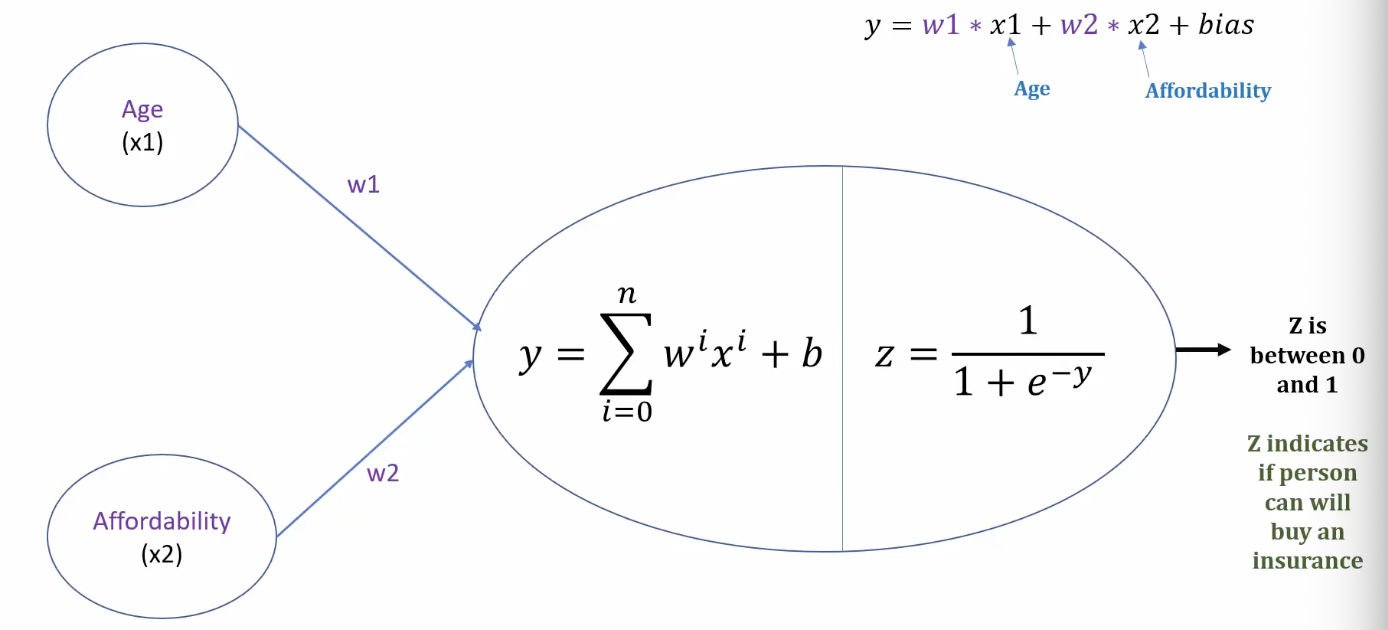

Taking example of the insurance problem, this is how our neural network looks like, which is just a logistic regression. A single logistic function can be thought of as a neural network.

During the training of the network, we feed the input to the network and calculate the error at each datapoint throughout the training phase 1 (also called an epoch). We then sum this error and backpropagate it to update the weights and the bias at the end of the epoch.

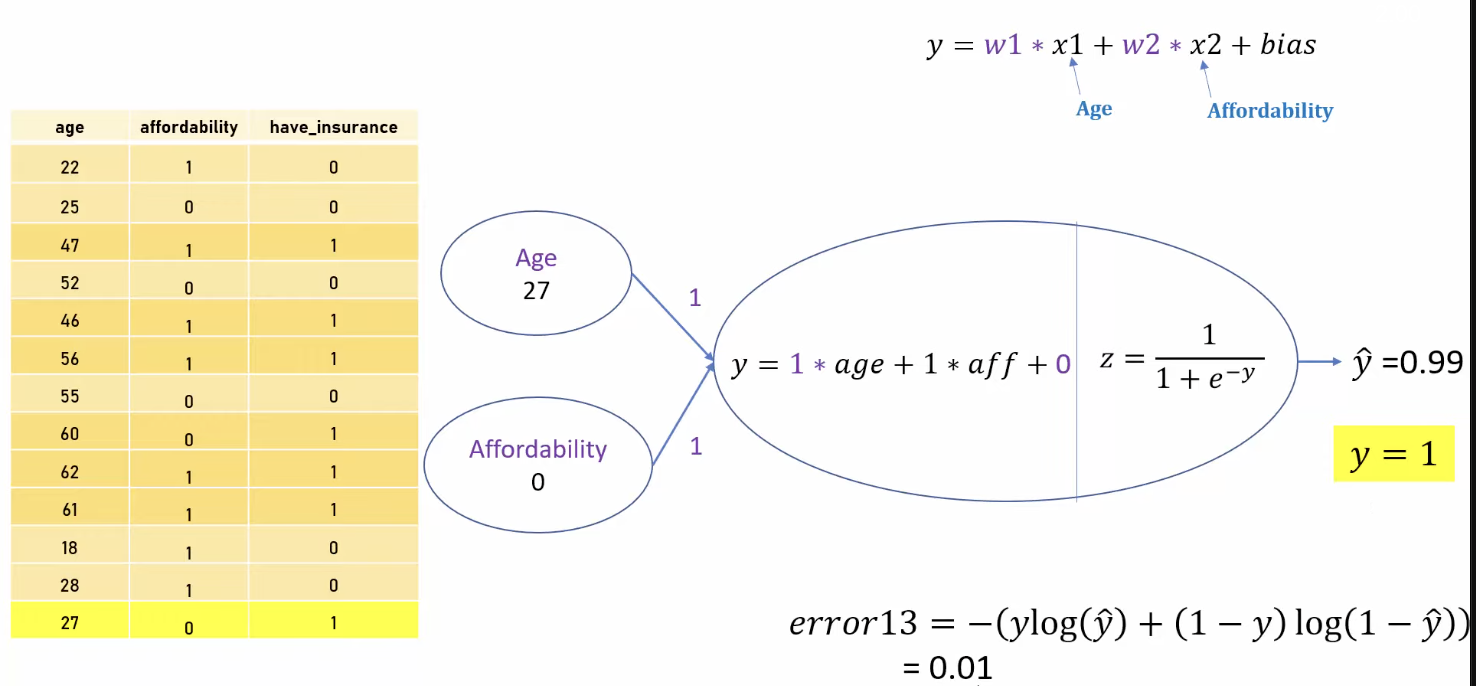

We update the weights and the bias using the following scheme:

$$
\beta = \beta - \text{something}
$$

This something is the gradient of the loss function with respect to each parameter that helps us reach the minima of the loss function. The full update scheme is:

for the weights: 

$$
w_{i} = w_{i} - \alpha * \frac{\partial \text{(Error)}}{\partial w_{i}}
$$

for the bias:

$$
b_{i} = b_{i} - \alpha * \frac{\partial \text{(Error)}}{\partial b_{i}}
$$

where $\alpha$ is the learning rate, which controls how fast we approach the minima.

Once we update the parameters, we again perform the same steps until the error falls below a permissible limit.

In [111]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [112]:
# importing dataset
df = pd.read_csv('insurance_data.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [113]:
# preparing training and testing dataset
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(df[['age', 'affordibility']], df['bought_insurance'], test_size = 0.2, random_state = 20)
X_train

,age,affordibility
18,19,0
25,54,1
23,45,1
22,40,1
21,26,0
5,56,1
24,50,1
19,18,1
14,49,1
17,58,1


In [114]:
# scaling the data so that everything is on the same scale
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [115]:
# building the neural network
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', 
    kernel_initializer='ones', bias_initializer = 'zeros')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_scaled, y_train, epochs = 5000)

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.5909 - loss: 0.6459
Epoch 2/5000


/Users/anmoldeepsingh/.pyenv/versions/3.12.11/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5909 - loss: 0.6456
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5909 - loss: 0.6454
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5909 - loss: 0.6451
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5909 - loss: 0.6448
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5909 - loss: 0.6446
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5909 - loss: 0.6443
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5909 - loss: 0.6441
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5909 - loss: 0.6438
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5909 - loss: 0.6435
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5909 - loss: 0.6433
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5909 - loss: 0.6430
Epoch 13/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5909 - loss: 0.642

In [116]:
# evaluating the model
model.evaluate(X_test_scaled, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8333 - loss: 0.4600


[0.4599873125553131, 0.8333333134651184]

In [117]:
# predicting values
for i, j in zip(model.predict(X_test_scaled), y_test):
    print(f"Prediction: {1 if i>0.5  else 0}  Truth: {j}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediction: 0  Truth: 0
Prediction: 1  Truth: 1
Prediction: 0  Truth: 0
Prediction: 0  Truth: 0
Prediction: 1  Truth: 0
Prediction: 0  Truth: 0


In [118]:
# checking the coefficients
coeff, intercept = model.get_weights()
coeff, intercept


(array([[5.942501 ],
        [1.3994232]], dtype=float32),
 array([-3.041245], dtype=float32))

Now we will implement the above algorithm from scratch:

In [119]:
# defining helper functions

# log-loss error
def logloss(yt, yp):
    epsilon = 1e-15
    yp = np.array([max(i, epsilon) for i in yp])
    yp = np.array([min(i, 1-epsilon) for i in yp])
    loss = -np.mean(yt*np.log(yp) + (1-yt)*np.log(1-yp))
    return loss

def sigmoid_numpy(x):
    return np.array(1/(1+np.exp(-x)))

# gradient descent algorithm
def gradient_descent(age, affordability, y_true, learning_rate, epochs, loss_threshold = 0.5):
    w1 = w2 = 1
    bias = 0
    n = len(age)

    # implementing the loop until loss falls below the threshold
    for i in range(epochs):
        weighted_sum = w1*age + w2*affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)

        loss = logloss(y_true, y_predicted)

        w1_derivative = (1/n)*np.dot(np.transpose(age), (y_predicted-y_true))
        w2_derivative = (1/n)*np.dot(np.transpose(affordability), (y_predicted-y_true))
        bias_derivative = np.mean(y_predicted-y_true)

        w1 = w1 - learning_rate*w1_derivative
        w2 = w2 - learning_rate*w2_derivative
        bias = bias - learning_rate*bias_derivative

        if i%100 == 0:
            print(f"Epoch: {i} W1: {w1} W2: {w2} Bias: {bias} Loss: {loss}")

        if loss < loss_threshold:
            print("Solution converged!")
            break
    return w1, w2, bias

# prediction function
def prediction_function(age, affordability, w1, w2, bias):
    probability = sigmoid_numpy(age*w1 + affordability*w2 + bias)
    prediction = [1 if i>=0.5 else 0 for i in probability]
    return prediction

In [120]:
# training the model
vals = gradient_descent(X_train_scaled['age'], X_train_scaled['affordibility'], y_train, 0.001, 20000)
print(vals)

Epoch: 0 W1: 0.9999798089262554 W2: 0.999913881183885 Bias: -0.00015798745585955348 Loss: 0.645879853336323
Epoch: 100 W1: 0.9980422149178974 W2: 0.9914458533172308 Bias: -0.01575870966625529 Loss: 0.6426898712065221
Epoch: 200 W1: 0.9962641715895626 W2: 0.9832598310604763 Bias: -0.030971919858150367 Loss: 0.6396722581861373
Epoch: 300 W1: 0.9946428308496453 W2: 0.97535139026233 Bias: -0.045804658478778966 Loss: 0.6368190302477609
Epoch: 400 W1: 0.9931752615295347 W2: 0.9677159039730409 Bias: -0.06026415063979179 Loss: 0.6341223775612718
Epoch: 500 W1: 0.9918584600991417 W2: 0.9603485636109764 Bias: -0.07435778062400841 Loss: 0.6315746812325889
Epoch: 600 W1: 0.9906893611046232 W2: 0.9532443997584344 Bias: -0.08809306712770874 Loss: 0.6291685276408194
Epoch: 700 W1: 0.9896648472773732 W2: 0.9463983024654782 Bias: -0.10147763935243162 Loss: 0.6268967204581372
Epoch: 800 W1: 0.9887817592708908 W2: 0.9398050409563729 Bias: -0.11451921404225898 Loss: 0.6247522904561
Epoch: 900 W1: 0.988036

In [121]:
# making predictions
predictions = prediction_function(X_test_scaled['age'], X_test_scaled['affordibility'], vals[0], vals[1], vals[2])

for i,j in zip(predictions, y_test):
    print(f"Prediction: {i} Truth: {j}")

Prediction: 0 Truth: 0
Prediction: 1 Truth: 1
Prediction: 0 Truth: 0
Prediction: 1 Truth: 0
Prediction: 1 Truth: 0
Prediction: 0 Truth: 0
